In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('APBD_2020.xlsx')

In [3]:
df.head()

Unnamed: 0 Akun Analisis Namakegiatan Namakegiatan_stem  Kodepemda  \
0           0       41. PAD   pendapatan             dapat       1.00   
1           1       41. PAD   pendapatan             dapat       1.00   
2           2       41. PAD   pendapatan             dapat       1.00   
3           3       41. PAD   pendapatan             dapat       1.00   
4           4       41. PAD          non               non       1.01   

      standarpemda  Tahun  Nilaianggaran  
0    Provinsi Aceh   2020   1.617439e+12  
1    Provinsi Aceh   2020   3.379314e+10  
2    Provinsi Aceh   2020   2.023865e+11  
3    Provinsi Aceh   2020   7.707312e+11  
4  Kab. Aceh Barat   2020   1.808626e+10

In [4]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)
from nltk.tokenize import word_tokenize 
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].apply(word_tokenize)
df.head()

Unnamed: 0 Akun Analisis Namakegiatan Namakegiatan_stem  Kodepemda  \
0           0       41. PAD   pendapatan           [dapat]       1.00   
1           1       41. PAD   pendapatan           [dapat]       1.00   
2           2       41. PAD   pendapatan           [dapat]       1.00   
3           3       41. PAD   pendapatan           [dapat]       1.00   
4           4       41. PAD          non             [non]       1.01   

      standarpemda  Tahun  Nilaianggaran  
0    Provinsi Aceh   2020   1.617439e+12  
1    Provinsi Aceh   2020   3.379314e+10  
2    Provinsi Aceh   2020   2.023865e+11  
3    Provinsi Aceh   2020   7.707312e+11  
4  Kab. Aceh Barat   2020   1.808626e+10

In [5]:
buang = ['tingkat', 'layan', 'ada', 'bina', 'rencana', 'selenggara', 'kembang', 'susun', 'bangun', 'sedia', 'jasa', 'bantu', 'pelihara', 'rutin', 'kelola',
         'laksana', 'evaluasi', 'monitoring', 'operasional', 'lapor', 'kantor', 'kerja', 'fasilitas', 'perintah', 'alat', 'drpd', 'rancang', 'atur', 'bimbing',
         'teknis', 'rkpd', 'tulis', 'tenaga', 'milik', 'daerah', 'dinas', 'rehabilitasi', 'berat', 'sistem', 'informasi', 'komunikasi', 'makan', 'minum', 'sumber',
         'daya', 'non' ,'instalasi', 'listrik', 'fisik', 'terang', 'langsung', 'ganda', 'barang', 'cetak', 'kendala', 'kala', 'masyarakat', 'rapat', 'sosialisasi',
         'konsultasi', 'informasi', 'tata', 'lingkung', 'pimpin', 'anggota', 'hasil', 'temu', 'awas', 'internal', 'tindak', 'arsip', 'administrasi', 'koordinasi',
         'dapat', 'lengkap', 'kualitas', 'data', 'surat', 'manfaat', 'rapat', 'rapatrapat', 'pustaka', 'dprd', 'gedung', 'batas', 'wilayah', 'komponen', 'kelompok',
         'skpd', 'jabat', 'rumah', 'verifikasi', 'intensifikasi', 'ekstentifikasi', 'belanja', 'kendara', 'motor', 'tambah', 'lurah', 'daerah', 'angkut', 'jalan',
         'terima', 'biaya', 'kendali', 'desa', 'kota', 'bidang', 'hidup', 'camat', 'kabupaten', 'uang', 'paripurna', 'uji', 'bijak', 'pemuda', 'tetap', 'pusat',
         'sinkronisasi', 'bahan', 'baca', 'perundangundangan', 'naik', 'pangkat', 'ekstensifikasi', 'duduk', 'dukung', 'disiplin', 'operasi', 'latih', 'bahaya', 'bekal',
         'khusus', 'harihari', 'hari', 'reformasi', 'birokrasi', 'potensi']

# Pada Nama Kegiatan
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].apply(lambda x: [i for i in x if i not in buang])

In [6]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

df["Namakegiatan_stem"] = df["Namakegiatan_stem"].apply(join_text_list)

In [7]:
import multiprocessing
from gensim.models import Word2Vec

In [8]:
cores = multiprocessing.cpu_count()

In [9]:
w2v_model = Word2Vec(min_count=10,
                     window=2,
                     vector_size=15,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     workers=cores-1)

In [10]:
import numpy as np
def vectorize(list_of_docs, model):
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [11]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)

In [12]:
w2v_model.build_vocab(df['Namakegiatan_stem'], progress_per=10000)
w2v_model.train(df['Namakegiatan_stem'], total_examples=w2v_model.corpus_count, epochs=50, report_delay=1)
w2v_model.init_sims(replace=True)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_12480/991895892.py:3: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [13]:
vectorized_docs = vectorize(df['Namakegiatan_stem'], model=w2v_model)

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
true_k = 50
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=10)
model.fit(vectorized_docs)
labels=model.labels_
results=pd.DataFrame(list(zip(df['Akun Analisis'],
                              df['Namakegiatan'],
                              df['Namakegiatan_stem'],
                              df['Kodepemda'],
                              df['standarpemda'],
                              df['Tahun'],
                              df['Nilaianggaran'],
                              labels)),columns=['Akun Analisis','Nama Kegiatan','Nama Kegiatan_stem',
                                                'Kode Pemda', 'Standar Pemda', 'Tahun', 'Nilai Anggaran', 'Cluster'])
print(results.sort_values(by=['Cluster']))

                  Akun Analisis  \
209997  52. Belanja Barang Jasa   
104813      51. Belanja Pegawai   
435336  52. Belanja Barang Jasa   
435268  52. Belanja Barang Jasa   
566228  52. Belanja Barang Jasa   
...                         ...   
33438       51. Belanja Pegawai   
38533       51. Belanja Pegawai   
495756  52. Belanja Barang Jasa   
256611  52. Belanja Barang Jasa   
628045        53. Belanja Modal   

                                            Nama Kegiatan  \
209997                             pemeliharaan pemakaman   
104813                             pendataan pajak daerah   
435336  ekstensifikasi intensifikasi potensi pajak daerah   
435268                verifikasi rencana kebutuhan barang   
566228                        pembahasan peraturan daerah   
...                                                   ...   
33438   koordinasi fasilitasi penyusunan indikator pem...   
38533                                indonesia pintar pip   
495756                        

In [16]:
# from sklearn.metrics import silhouette_score
# score = silhouette_score(vectorized_docs, model.labels_, metric='euclidean')
# print('Silhouetter Score: %.3f' % score)

In [17]:
results.head()

Akun Analisis Nama Kegiatan Nama Kegiatan_stem  Kode Pemda    Standar Pemda  \
0       41. PAD    pendapatan                           1.00    Provinsi Aceh   
1       41. PAD    pendapatan                           1.00    Provinsi Aceh   
2       41. PAD    pendapatan                           1.00    Provinsi Aceh   
3       41. PAD    pendapatan                           1.00    Provinsi Aceh   
4       41. PAD           non                           1.01  Kab. Aceh Barat   

   Tahun  Nilai Anggaran  Cluster  
0   2020    1.617439e+12        1  
1   2020    3.379314e+10        1  
2   2020    2.023865e+11        1  
3   2020    7.707312e+11        1  
4   2020    1.808626e+10        1

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 14400x5040 with 0 Axes>

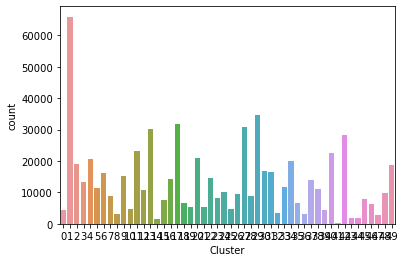

<Figure size 14400x5040 with 0 Axes>

In [18]:
import seaborn as sns
sns.countplot('Cluster', data = results)
plt.figure(figsize=(200,70)) 

In [19]:
results.loc[results['Nama Kegiatan_stem'] == '']

Akun Analisis     Nama Kegiatan  \
0                                  41. PAD        pendapatan   
1                                  41. PAD        pendapatan   
2                                  41. PAD        pendapatan   
3                                  41. PAD        pendapatan   
4                                  41. PAD               non   
...                                    ...               ...   
670678  66. Pengeluaran Pembiayaan Lainnya  belanja langsung   
670679  66. Pengeluaran Pembiayaan Lainnya               non   
670680  66. Pengeluaran Pembiayaan Lainnya               non   
670681  66. Pengeluaran Pembiayaan Lainnya               non   
670682  66. Pengeluaran Pembiayaan Lainnya               non   

       Nama Kegiatan_stem  Kode Pemda            Standar Pemda  Tahun  \
0                                1.00            Provinsi Aceh   2020   
1                                1.00            Provinsi Aceh   2020   
2                                1.00            Provinsi Aceh   2020   
3                                1.00            Provinsi Aceh   2020   
4                                1.01          Kab. Aceh Barat   2020   
...                   ...         ...                      ...    ...   
670678                          24.17             Kab. Nagekeo   2020   
670679                          24.22              Kab. Malaka   2020   
670680                          25.01  Kab. Kepulauan Tanimbar   2020   
670681                          26.01         Kab. Biak Numfor   2020   
670682                          29.07      Kab. Belitung Timur   2020   

        Nilai Anggaran  Cluster  
0         1.617439e+12        1  
1         3.379314e+10        1  
2         2.023865e+11        1  
3         7.707312e+11        1  
4         1.808626e+10        1  
...                ...      ...  
670678    1.500000e+09        1  
670679    1.000000e+10        1  
670680    3.330168e+10        1  
670681    4.109020e+10        1  
670682    1.000000e+09        1  

[65943 rows x 8 columns]

In [20]:
results['Nama Kegiatan_stem'] = results['Nama Kegiatan_stem'].replace([''], 'kosong')

In [28]:
results.loc[results['Cluster'] == 5][:60]

Akun Analisis                                      Nama Kegiatan  \
5238  51. Belanja Pegawai                                perlindungan sosial   
5634  51. Belanja Pegawai       isbat nikah korban konflik masyarakat miskin   
5839  51. Belanja Pegawai                         pengembangan regional sikd   
5923  51. Belanja Pegawai  penyelenggaraan forum komunikasi koordinasi pe...   
5924  51. Belanja Pegawai  penyelenggaraan government chief information o...   
5967  51. Belanja Pegawai                 perlindungan sosial korban konflik   
6021  51. Belanja Pegawai  fasilitasi penyelesaian konflikkonflik pertanahan   
6068  51. Belanja Pegawai  monitoring evaluasi pelaporan ketersediaan oba...   
6371  51. Belanja Pegawai             pembinaan pelayanan teknologi pedesaan   
6378  51. Belanja Pegawai                        pembinaan qori qoriah otsus   
6409  51. Belanja Pegawai                          penanganan konflik sosial   
6437  51. Belanja Pegawai  pendidikan pelatihan teknis tugas fungsi pns d...   
6439  51. Belanja Pegawai  pendokumentasian peraturan perundangundangan d...   
6564  51. Belanja Pegawai  penyediaan peralatan perlengkapan operasional ...   
6640  51. Belanja Pegawai                        penyusunan profil kesehatan   
6698  51. Belanja Pegawai                                    revolusi mental   
6711  51. Belanja Pegawai  sosialisasi bimbingan teknis aplikasi layanan ...   
6715  51. Belanja Pegawai  sosialisasi kebijakan kependudukan pencatatan ...   
6742  51. Belanja Pegawai  upaya kesehatan preventif promotif puskesmas k...   
6746  51. Belanja Pegawai  upaya kesehatan preventif promotif puskesmas m...   
6751  51. Belanja Pegawai  upaya kesehatan preventif promotif puskesmas t...   
6757  51. Belanja Pegawai  workshop penilaian angka kredit jabatan fungsi...   
6758  51. Belanja Pegawai  workshop penyusunan rencana aksi daerah gugus ...   
6765  51. Belanja Pegawai  dialog audiensi tokohtokoh masyarakat pimpinan...   
6771  51. Belanja Pegawai  fasilitasi penyelesaian konflikkonflik pertanahan   
6772  51. Belanja Pegawai  fasilitasi penyelesaian perselisihan partai po...   
6945  51. Belanja Pegawai  pengembangan sistem penghargaan perlindungan p...   
6973  51. Belanja Pegawai  peningkatan solidaritas ikatan sosial dikalang...   
7030  51. Belanja Pegawai                        penyusunan profil kesehatan   
7122  51. Belanja Pegawai    legislasi rancangan peraturan perundangundangan   
7230  51. Belanja Pegawai                          penanganan konflik sosial   
7365  51. Belanja Pegawai             penyelesaian konflikkonflik pertanahan   
7464  51. Belanja Pegawai  fasilitasi penyelesaian konflikkonflik pertanahan   
7466  51. Belanja Pegawai  identifikasi solusi permasalahan mutu pendidik...   
7559  51. Belanja Pegawai  peningkatan solidaritas ikatan sosial dikalang...   
7652  51. Belanja Pegawai      festival lomba seni siswa nasional fls2n doka   
7655  51. Belanja Pegawai               gelar teknologi tk provinsi nasional   
7690  51. Belanja Pegawai    legislasi rancangan peraturan perundangundangan   
7778  51. Belanja Pegawai              pelatihan life skill santri dana doka   
7814  51. Belanja Pegawai                    pelayanan perpustakaan keliling   
7869  51. Belanja Pegawai                               pembinaan forum anak   
7914  51. Belanja Pegawai    penataan digitalisasi arsip vital catatan sipil   
7940  51. Belanja Pegawai       penelitian pengembangan teknologi peternakan   
7941  51. Belanja Pegawai         penelitian kajian komoditi unggulan daerah   
7942  51. Belanja Pegawai  penelitian kajian studi analis bidang ekonomi ...   
7962  51. Belanja Pegawai             pengawasan perizinan profesi kesehatan   
7973  51. Belanja Pegawai                pengelolaan aplikasi profil kampung   
8027  51. Belanja Pegawai     pengembangan sistem inovasi teknologi industri   
8028  51. Belanja Pegawai  pengembangan sistem penghargaan perlindungan p...   
8031  51. Be

Cluster: 0


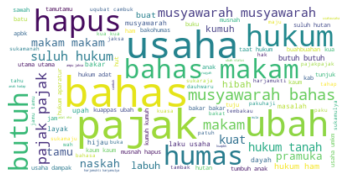

Cluster: 1


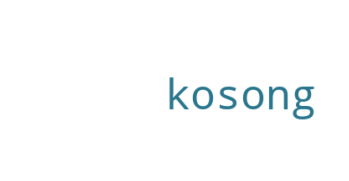

Cluster: 2


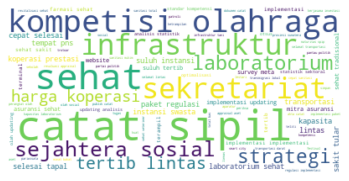

Cluster: 3


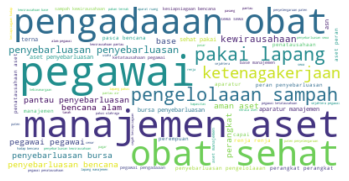

Cluster: 4


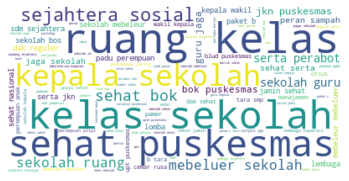

Cluster: 5


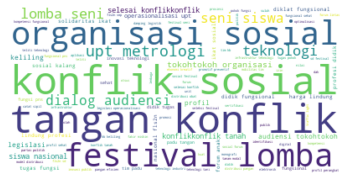

Cluster: 6


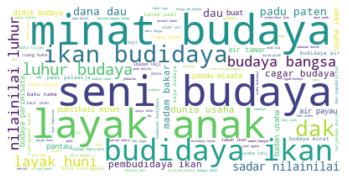

Cluster: 7


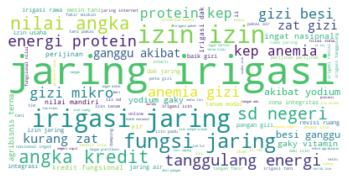

Cluster: 8


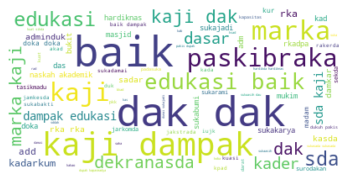

Cluster: 9


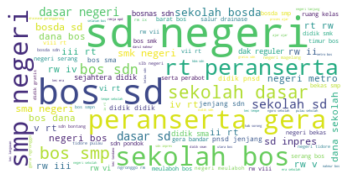

Cluster: 10


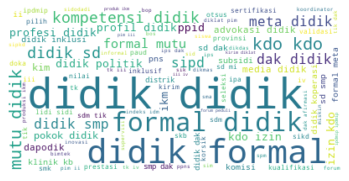

Cluster: 11


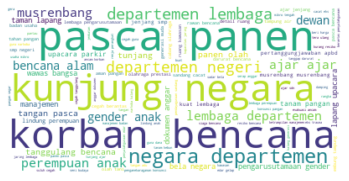

Cluster: 12


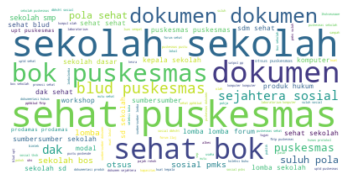

Cluster: 13


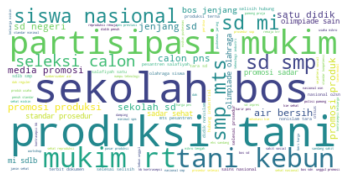

Cluster: 14


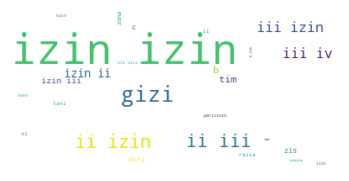

Cluster: 15


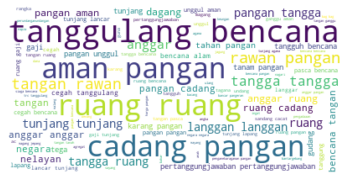

Cluster: 16


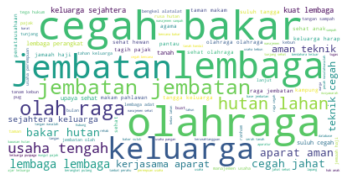

Cluster: 17


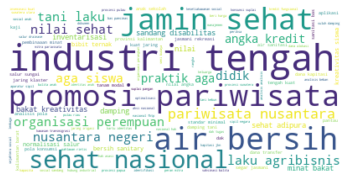

Cluster: 18


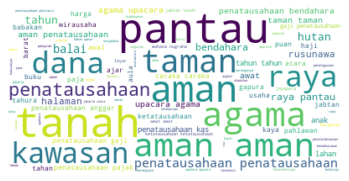

Cluster: 19


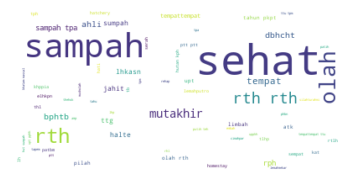

Cluster: 20


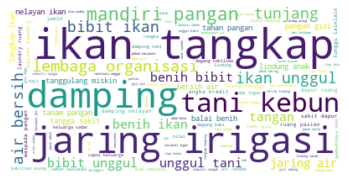

Cluster: 21


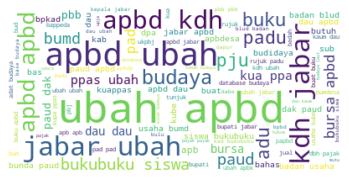

Cluster: 22


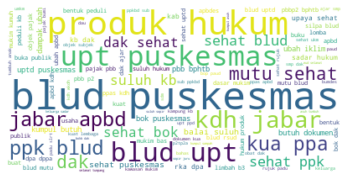

Cluster: 23


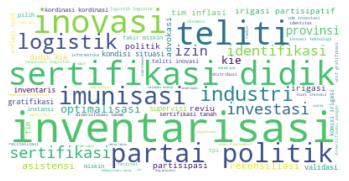

Cluster: 24


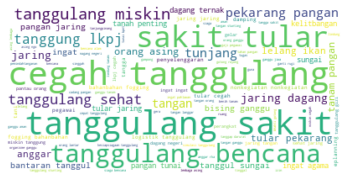

Cluster: 25


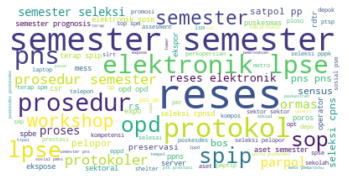

Cluster: 26


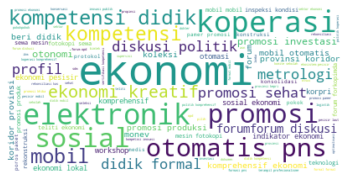

Cluster: 27


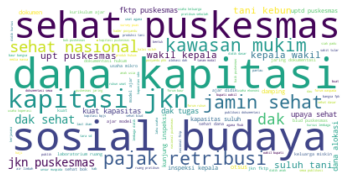

Cluster: 28


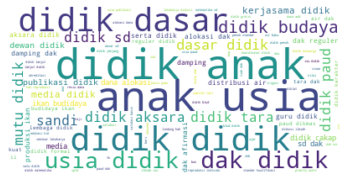

Cluster: 29


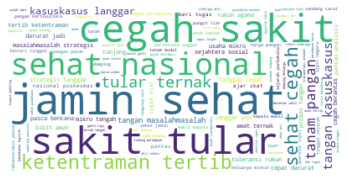

Cluster: 30


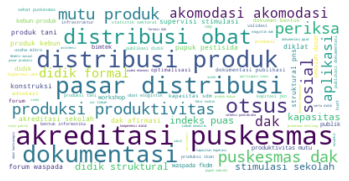

Cluster: 31


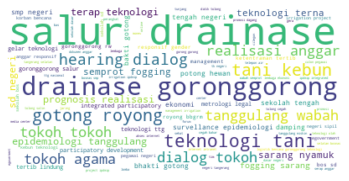

Cluster: 32


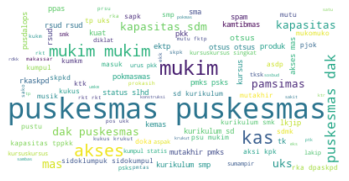

Cluster: 33


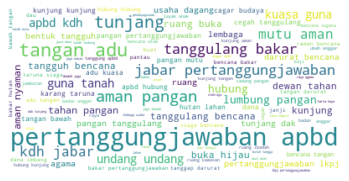

Cluster: 34


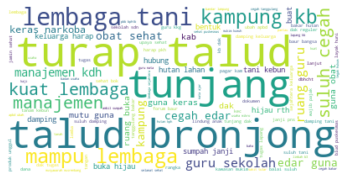

Cluster: 35


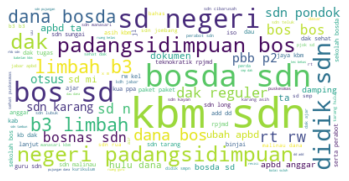

Cluster: 36


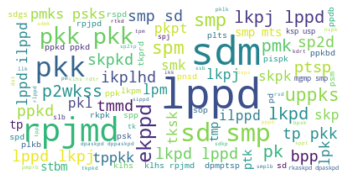

Cluster: 37


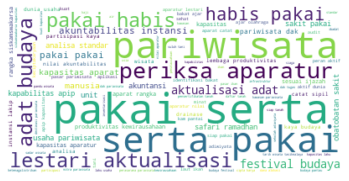

Cluster: 38


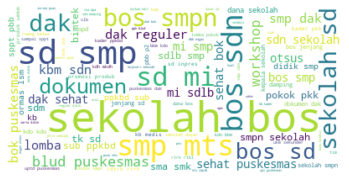

Cluster: 39


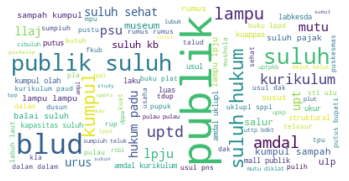

Cluster: 40


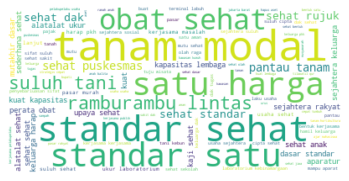

Cluster: 41


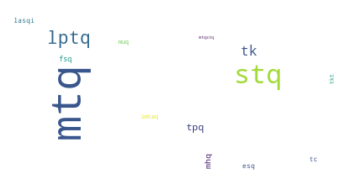

Cluster: 42


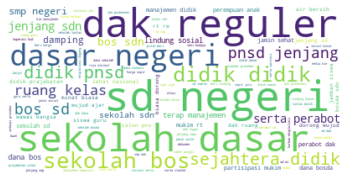

Cluster: 43


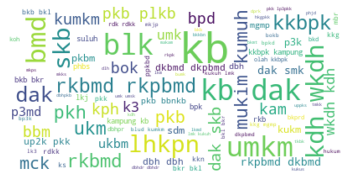

Cluster: 44


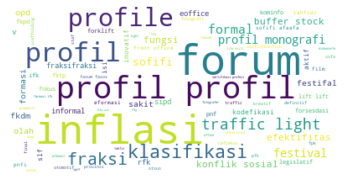

Cluster: 45


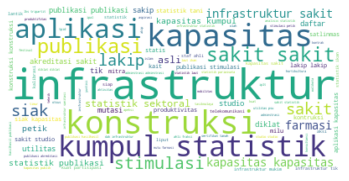

Cluster: 46


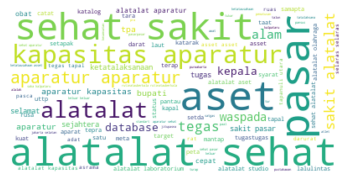

Cluster: 47


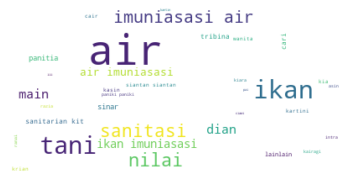

Cluster: 48


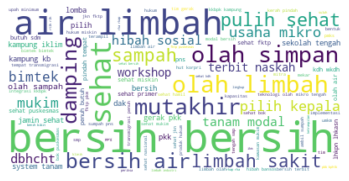

Cluster: 49


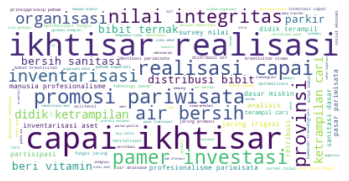

In [22]:
from wordcloud import WordCloud

result= results

for k in range(0,true_k):
   s=result[result.Cluster==k]
   text=s['Nama Kegiatan_stem'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   titles=results[results.Cluster==k]['Nama Kegiatan_stem']         
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [23]:
results.groupby(by='Cluster').sum()

Kode Pemda      Tahun  Nilai Anggaran
Cluster                                       
0          62918.07    8653680    3.229121e+12
1         994764.83  133204860    1.731196e+15
2         288521.51   38523420    1.280121e+13
3         200473.42   26888220    1.299081e+13
4         309498.16   41387780    1.704398e+13
5         171471.29   23213840    5.009005e+12
6         233995.43   32764400    2.364637e+13
7         122737.10   17776000    6.342687e+12
8          48433.97    6512480    4.195602e+12
9         227601.19   30786820    8.701450e+12
10         70333.76    9498040    1.505571e+13
11        339875.50   47136700    1.422961e+13
12        165514.81   22034160    1.522933e+13
13        463853.01   60927240    2.814202e+13
14         25595.06    3403700    1.978111e+12
15        111096.24   15358060    7.552022e+12
16        207077.95   28936500    1.788739e+13
17        476320.51   64375380    2.250878e+13
18         99378.82   13463300    6.165902e+12
19         79106.13   10748420    9.430923e+12
20        306015.25   42630080    1.513684e+13
21         79928.73   10643380    3.518603e+12
22        211723.73   29451600    1.729621e+13
23        126744.89   16638740    4.507129e+12
24        151687.18   20749440    3.006197e+13
25         71103.21    9403100    4.404491e+12
26        144271.28   19373820    4.280756e+12
27        459808.22   62020060    3.229491e+13
28        134119.40   17937600    9.557194e+12
29        505593.05   70063700    2.317568e+13
30        255351.10   33746120    9.835835e+12
31        242800.87   33471400    1.231839e+13
32         51776.66    6752860    5.965832e+12
33        175045.71   23939020    1.031927e+13
34        293536.17   40610080    1.530191e+13
35         93453.12   13202720    4.314258e+12
36         48153.73    6360980    4.531518e+12
37        208147.34   28271920    7.655285e+12
38        164773.97   22565420    1.469630e+13
39         66117.66    9124340    1.040178e+13
40        328947.64   45379300    1.799452e+13
41          4480.96     672660    1.768193e+11
42        428212.95   57095300    2.882549e+13
43         25722.94    3530960    1.627668e+12
44         27351.56    3456220    7.643549e+11
45        122754.68   16234740    1.358324e+13
46         93245.16   12538140    7.539889e+12
47         42612.45    5649940    9.263885e+12
48        146240.98   19860640    9.519202e+12
49        282428.99   37812380    1.470406e+13

In [24]:
results['Label'] = results['Cluster']

In [25]:
results

Akun Analisis     Nama Kegiatan  \
0                                  41. PAD        pendapatan   
1                                  41. PAD        pendapatan   
2                                  41. PAD        pendapatan   
3                                  41. PAD        pendapatan   
4                                  41. PAD               non   
...                                    ...               ...   
670678  66. Pengeluaran Pembiayaan Lainnya  belanja langsung   
670679  66. Pengeluaran Pembiayaan Lainnya               non   
670680  66. Pengeluaran Pembiayaan Lainnya               non   
670681  66. Pengeluaran Pembiayaan Lainnya               non   
670682  66. Pengeluaran Pembiayaan Lainnya               non   

       Nama Kegiatan_stem  Kode Pemda            Standar Pemda  Tahun  \
0                  kosong        1.00            Provinsi Aceh   2020   
1                  kosong        1.00            Provinsi Aceh   2020   
2                  kosong        1.00            Provinsi Aceh   2020   
3                  kosong        1.00            Provinsi Aceh   2020   
4                  kosong        1.01          Kab. Aceh Barat   2020   
...                   ...         ...                      ...    ...   
670678             kosong       24.17             Kab. Nagekeo   2020   
670679             kosong       24.22              Kab. Malaka   2020   
670680             kosong       25.01  Kab. Kepulauan Tanimbar   2020   
670681             kosong       26.01         Kab. Biak Numfor   2020   
670682             kosong       29.07      Kab. Belitung Timur   2020   

        Nilai Anggaran  Cluster  Label  
0         1.617439e+12        1      1  
1         3.379314e+10        1      1  
2         2.023865e+11        1      1  
3         7.707312e+11        1      1  
4         1.808626e+10        1      1  
...                ...      ...    ...  
670678    1.500000e+09        1      1  
670679    1.000000e+10        1      1  
670680    3.330168e+10        1      1  
670681    4.109020e+10        1      1  
670682    1.000000e+09        1      1  

[670683 rows x 9 columns]

In [29]:
results['Label'] = results['Label'].replace([0], 'Lainnya')    
results['Label'] = results['Label'].replace([1], 'Lainnya')
results['Label'] = results['Label'].replace([2], 'Lainnya')
results['Label'] = results['Label'].replace([3], 'Kesehatan')
results['Label'] = results['Label'].replace([4], 'Pendidikan')
results['Label'] = results['Label'].replace([5], 'Lainnya')
results['Label'] = results['Label'].replace([6], 'Pariwisata')
results['Label'] = results['Label'].replace([7], 'Pertanian')
results['Label'] = results['Label'].replace([8], 'Lainnya')
results['Label'] = results['Label'].replace([9], 'Pendidikan')
results['Label'] = results['Label'].replace([10], 'Pendidikan')
results['Label'] = results['Label'].replace([11], 'Pertanian')
results['Label'] = results['Label'].replace([12], 'Kesehatan')
results['Label'] = results['Label'].replace([13], 'Pertanian')
results['Label'] = results['Label'].replace([14], 'Lainnya')
results['Label'] = results['Label'].replace([15], 'Lainnya')
results['Label'] = results['Label'].replace([16], 'Lainnya')
results['Label'] = results['Label'].replace([17], 'UMKM')
results['Label'] = results['Label'].replace([18], 'Pariwisata')
results['Label'] = results['Label'].replace([19], 'Kesehatan')
results['Label'] = results['Label'].replace([20], 'Pertanian')
results['Label'] = results['Label'].replace([21], 'Lainnya')
results['Label'] = results['Label'].replace([22], 'Kesehatan')
results['Label'] = results['Label'].replace([23], 'Lainnya')
results['Label'] = results['Label'].replace([24], 'Lainnya')
results['Label'] = results['Label'].replace([25], 'Lainnya')
results['Label'] = results['Label'].replace([26], 'Lainnya')
results['Label'] = results['Label'].replace([27], 'Pariwisata')
results['Label'] = results['Label'].replace([28], 'Pendidikan')
results['Label'] = results['Label'].replace([29], 'Kesehatan')
results['Label'] = results['Label'].replace([30], 'UMKM')
results['Label'] = results['Label'].replace([31], 'Pertanian')
results['Label'] = results['Label'].replace([32], 'Kesehatan')
results['Label'] = results['Label'].replace([33], 'Lainnya')
results['Label'] = results['Label'].replace([34], 'Lainnya')
results['Label'] = results['Label'].replace([35], 'Pendidikan')
results['Label'] = results['Label'].replace([36], 'Lainnya')
results['Label'] = results['Label'].replace([37], 'Pariwisata')
results['Label'] = results['Label'].replace([38], 'Pendidikan')
results['Label'] = results['Label'].replace([39], 'Lainnya')
results['Label'] = results['Label'].replace([40], 'Pertanian')
results['Label'] = results['Label'].replace([41], 'Lainnya')
results['Label'] = results['Label'].replace([42], 'Pendidikan')
results['Label'] = results['Label'].replace([43], 'Lainnya')
results['Label'] = results['Label'].replace([44], 'Lainnya')
results['Label'] = results['Label'].replace([45], 'Lainnya')
results['Label'] = results['Label'].replace([46], 'Kesehatan')
results['Label'] = results['Label'].replace([47], 'Pertanian')
results['Label'] = results['Label'].replace([48], 'Kesehatan')
results['Label'] = results['Label'].replace([49], 'Lainnya')

In [30]:
results.groupby(by='Label').sum()

Kode Pemda      Tahun  Nilai Anggaran  Cluster
Label                                                     
Kesehatan   1453673.94  198337740    1.011479e+14  2462987
Lainnya     3529206.61  476356400    1.902032e+15  4273684
Pariwisata  1001329.81  136519680    6.976247e+13  1564123
Pendidikan  1427992.55  192473680    9.819439e+13  2355173
Pertanian   1846841.82  252970660    1.034280e+14  2676200
UMKM         731671.61   98121500    3.234462e+13  1042953

In [31]:
results.to_excel('Data_APBD_2020.xlsx')